# Import Libraries and Dataset

In [283]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Pre-processing
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

# Classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Pickle
import pickle

# Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('patrick.csv')
df

conversation_id_str                      created_at  favorite_count  \
0     1877683639900938376  Fri Jan 10 23:50:36 +0000 2025               0   
1     1877344762237211011  Fri Jan 10 23:49:55 +0000 2025               0   
2     1877865070635442583  Fri Jan 10 23:48:16 +0000 2025               0   
3     1877863086398603643  Fri Jan 10 23:40:23 +0000 2025               0   
4     1877498752279494688  Fri Jan 10 23:29:13 +0000 2025               0   
...                   ...                             ...             ...   
2252  1876434141631442968  Tue Jan 07 05:19:56 +0000 2025               2   
2253  1875792458820517938  Tue Jan 07 05:18:26 +0000 2025               0   
2254  1876498603025572120  Tue Jan 07 05:18:25 +0000 2025               2   
2255  1876459728748056713  Tue Jan 07 05:18:06 +0000 2025               0   
2256  1876144838913265757  Tue Jan 07 05:17:51 +0000 2025               0   

                                              full_text               id_str  \
0     @unmagnetism Guwa mlh pnasaran gmn cara maenny...  1877865659708661779   
1     @augusta_tehe @iam_romans @garagarabola_ @bola...  1877865485515252096   
2     [BREAKING NEWS] Eksklusif tvOne Detik-detik Pa...  1877865070635442583   
3     Patrick Kluivert Sampai di Indonesia Hari Ini!...  1877863086398603643   
4     @kalibrant23 @ainurohman Perlu adanya pertandi...  1877860277598998923   
...                                                 ...                  ...   
2252  @unmagnetism Boleh ada yg jelasin gaa problema...  1876498985105731610   
2253  @idextratime Ngimpi lo kejauhan. Penggantinya ...  1876498608360677713   
2254  Dengan gagalnya Van Gaal menjadi Dirtek Timnas...  1876498603025572120   
2255  @dhemit_is_back @PSSI Mrk blg g trkait mafia a...  1876498525472932057   
2256  @retiofenin27417 @OghieGigs @Curacaofootbal1 @...  1876498459941072960   

                                            image_url in_reply_to_screen_name  \
0                                                 NaN             unmagnetism   
1                                                 NaN                  ycamdg   
2                                                 NaN                     NaN   
3     https://pbs.twimg.com/media/Gg-ChmJaQAAB1J7.jpg                     NaN   
4                                                 NaN             kalibrant23   
...                                               ...                     ...   
2252                                              NaN             unmagnetism   
2253                                              NaN             idextratime   
2254  https://pbs.twimg.com/media/GgqpiLRa8AAQMrG.jpg                     NaN   
2255                                              NaN          dhemit_is_back   
2256                                              NaN         retiofenin27417   

     lang                location  quote_count  reply_count  retweet_count  \
0      in                     NaN            0            0              0   
1      in                  Sleman            0            1              0   
2      in                     NaN            0            0              0   
3      in                 Jakarta            0            0              0   
4      in  Jakarta Capital Region            0            0              0   
...   ...                     ...          ...          ...            ...   
2252   in                     NaN            0            5              0   
2253   in                     NaN            0            0              0   
2254   in              Indonesia             0            1              0   
2255   in                     NaN            0            0              0   
2256   in                     NaN            0            0              0   

                                              tweet_url          user_id_str  \
0     https://x.com/donmlengos/status/18778656597086...  1479312146227818498   
1       https://x.com/ycamdg/status/18778654855152

# Exploratory Data Analysis (EDA)

## The Columns of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      2257 non-null   int64 
 1   created_at               2257 non-null   object
 2   favorite_count           2257 non-null   int64 
 3   full_text                2257 non-null   object
 4   id_str                   2257 non-null   int64 
 5   image_url                497 non-null    object
 6   in_reply_to_screen_name  746 non-null    object
 7   lang                     2257 non-null   object
 8   location                 1487 non-null   object
 9   quote_count              2257 non-null   int64 
 10  reply_count              2257 non-null   int64 
 11  retweet_count            2257 non-null   int64 
 12  tweet_url                2257 non-null   object
 13  user_id_str              2257 non-null   int64 
 14  username                 2257 non-null  

## Word Cloud

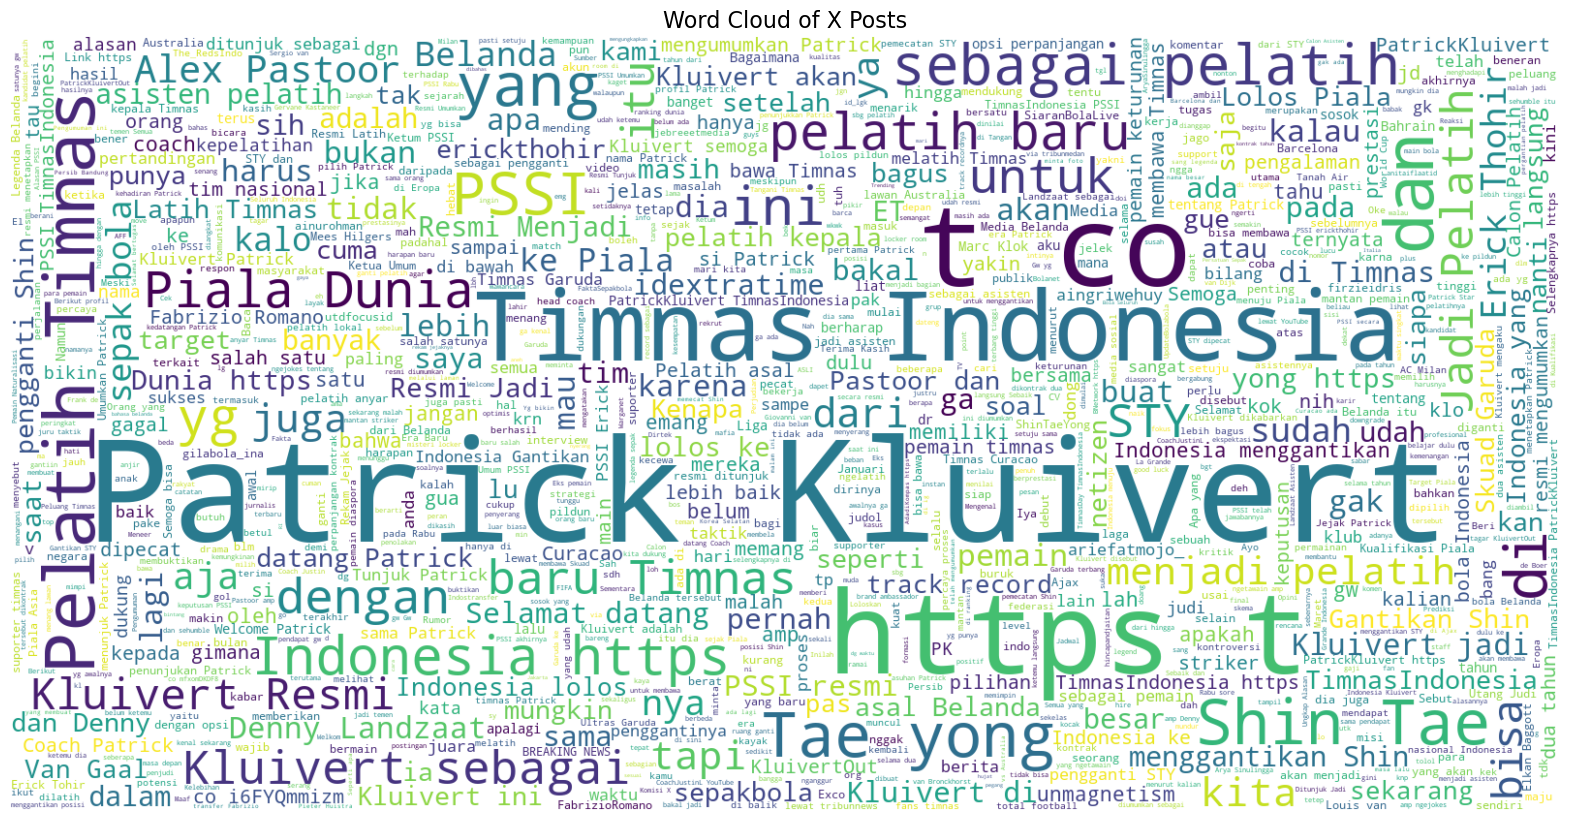

In [8]:
text = ' '.join(df['full_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(text)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of X Posts", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Data Pre-processing

## Select Only the full_text Column

In [10]:
df_cp = df.copy()

df_cp = df_cp[['full_text']]
df_cp

full_text
0     @unmagnetism Guwa mlh pnasaran gmn cara maenny...
1     @augusta_tehe @iam_romans @garagarabola_ @bola...
2     [BREAKING NEWS] Eksklusif tvOne Detik-detik Pa...
3     Patrick Kluivert Sampai di Indonesia Hari Ini!...
4     @kalibrant23 @ainurohman Perlu adanya pertandi...
...                                                 ...
2252  @unmagnetism Boleh ada yg jelasin gaa problema...
2253  @idextratime Ngimpi lo kejauhan. Penggantinya ...
2254  Dengan gagalnya Van Gaal menjadi Dirtek Timnas...
2255  @dhemit_is_back @PSSI Mrk blg g trkait mafia a...
2256  @retiofenin27417 @OghieGigs @Curacaofootbal1 @...

[2257 rows x 1 columns]

## Check Data Type

In [12]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  2257 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


## Check Missing Value

In [14]:
df_cp.isnull().sum()

full_text    0
dtype: int64

## Check Duplicate Value

In [16]:
df_cp.duplicated().sum()

19

In [18]:
df_cp[df_cp.duplicated]

full_text
563   LEGENDA Belanda Patrick Kluivert yang juga pel...
677   @Titipan_Mafia Orang yang ngetawain &amp; ngej...
900   Kenapa Alex Pastoor yg mengatur taktik strateg...
904   Menurutku si Patrick Kluivert sebagai daya tar...
1247  Asisten Pelatih Timnas Garuda yg baru yaitu De...
1431  @unmagnetism Terungkap! Patrick Kluivert Terta...
1534  @idextratime Patrick Kluivert Resmi Menjadi Pe...
1569  @UpdateBolabola Berikut profil Patrick Kluiver...
1585  @idextratime Berikut profil Patrick Kluivert p...
1608  @unmagnetism Resmi Patrick Kluivert Jadi Pelat...
1641  @SiaranBolaLive Patrick Kluivert Resmi Menjadi...
1675  @Indostransfer Patrick Kluivert Resmi Menjadi ...
1687  @idextratime Patrick Kluivert Resmi Menjadi Pe...
1688  @idextratime Patrick Kluivert Resmi Menjadi Pe...
1689  @idextratime Patrick Kluivert Resmi Menjadi Pe...
1705  @FaktaSepakbola Patrick Kluivert Resmi Menjadi...
1706  @unmagnetism Patrick Kluivert Resmi Menjadi Pe...
1707  @Indostransfer Patrick Kluivert Resmi Menjadi ...
2038  Borok Patrick Kluivert Dibongkar Media Curacao...

In [20]:
df_cp.drop_duplicates(inplace = True)
df_cp.duplicated().sum()

0

## Clean Text

In [26]:
!pip install Sastrawi

In [28]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)

print(output)
# ekonomi indonesia sedang dalam tumbuh yang bangga

print(stemmer.stem('Mereka meniru-nirukannya'))
# mereka tiru

ekonomi indonesia sedang dalam tumbuh yang bangga
mereka tiru


In [30]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

def clean(Text):
    text = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    text = text.lower() #converting to lowecase
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if not word in stopwords.words("indonesian")]
    text = ' '.join(text)
    return text

df_cp["clean_text"] = df_cp["full_text"].apply(clean)
df_cp.head()

full_text  \
0  @unmagnetism Guwa mlh pnasaran gmn cara maenny...   
1  @augusta_tehe @iam_romans @garagarabola_ @bola...   
2  [BREAKING NEWS] Eksklusif tvOne Detik-detik Pa...   
3  Patrick Kluivert Sampai di Indonesia Hari Ini!...   
4  @kalibrant23 @ainurohman Perlu adanya pertandi...   

                                          clean_text  
0  unmagnetism guwa mlh pnasaran gmn maennya ala ...  
1  augusta tehe iam romans garagarabola bolacomid...  
2  breaking news eksklusif tvone detik detik patr...  
3  patrick kluivert indonesia https t co nezyxmvv...  
4  kalibrant ainurohman tanding ujicoba taktik st...

## Vectorization

In [34]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_cp["clean_text"])

#Let's have a look at our feature
X.dtype

dtype('float64')

In [36]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36584 stored elements and shape (2238, 6502)>

# Clustering

## Elbow Method

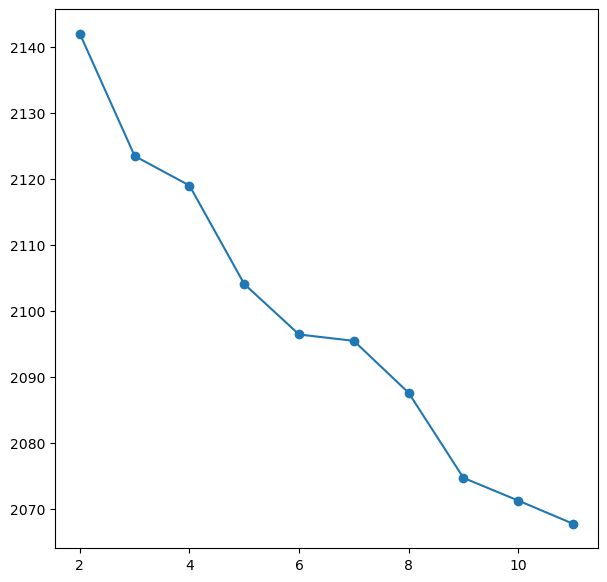

In [38]:
clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
inertia = []

for c in clusters_range:
    kmeans = KMeans(n_clusters = c, random_state = 42).fit(X) # Training clustering into c clusters with Kmeans
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (7, 7))
plt.plot(clusters_range, inertia, marker = 'o')

We will choose between 2 and 3 clusters

## Silhouette Score

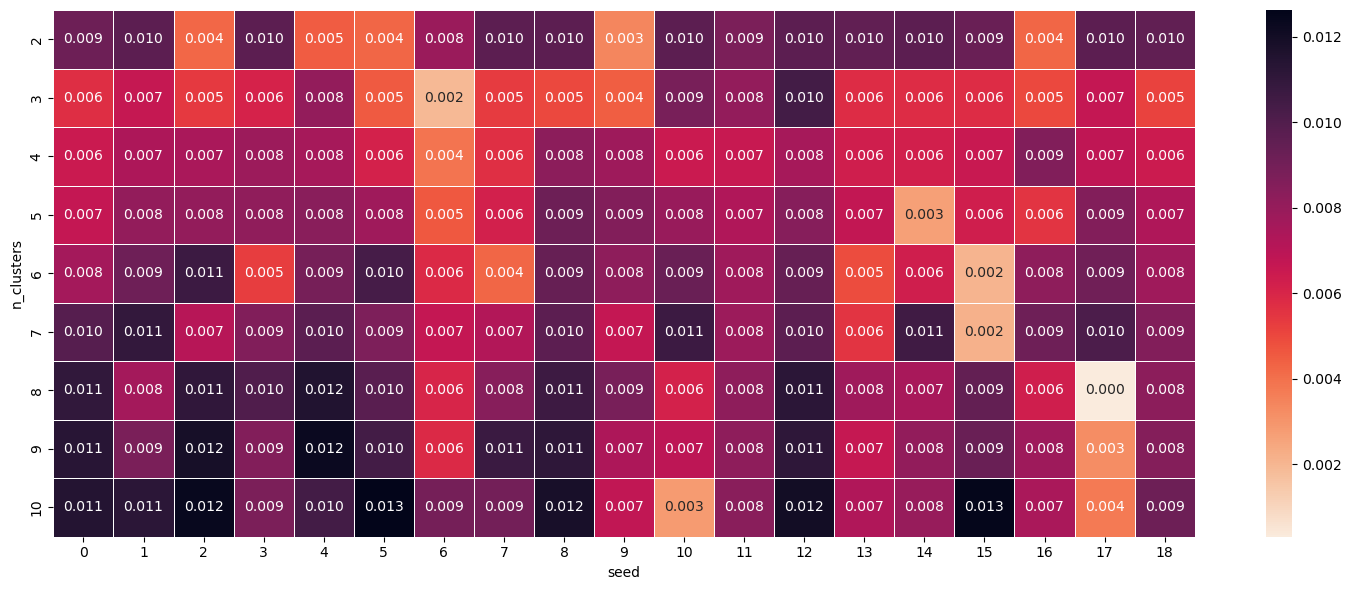

In [40]:
clusters_range=range(2, 11)
random_range  =range(0, 19)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters = c, random_state = r)
        cluster_labels = clusterer.fit_predict(X)
        sillhouette_avg = silhouette_score(X, cluster_labels)
        results.append([c, r, sillhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

## Dimensional Reduction

In [150]:
pca = PCA(n_components=3, random_state=42, svd_solver='arpack')

X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])
X_pca_df

X1        X2        X3
0    -0.140443  0.028665 -0.023123
1    -0.102640  0.028359 -0.030980
2    -0.061664  0.005257 -0.011430
3     0.088162 -0.061514  0.010140
4    -0.099198 -0.025111  0.019883
...        ...       ...       ...
2233 -0.141776  0.016448 -0.029748
2234 -0.082927  0.072843 -0.020926
2235  0.068923  0.197111 -0.020805
2236 -0.132936  0.048640 -0.036536
2237 -0.094372  0.055097 -0.022672

[2238 rows x 3 columns]

## Modelling

In [196]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)
X_pca_df

X1        X2        X3 Labels
0    -0.140443  0.028665 -0.023123      0
1    -0.102640  0.028359 -0.030980      0
2    -0.061664  0.005257 -0.011430      0
3     0.088162 -0.061514  0.010140      1
4    -0.099198 -0.025111  0.019883      0
...        ...       ...       ...    ...
2233 -0.141776  0.016448 -0.029748      0
2234 -0.082927  0.072843 -0.020926      0
2235  0.068923  0.197111 -0.020805      1
2236 -0.132936  0.048640 -0.036536      0
2237 -0.094372  0.055097 -0.022672      0

[2238 rows x 4 columns]

# Visualization of Clustering Results

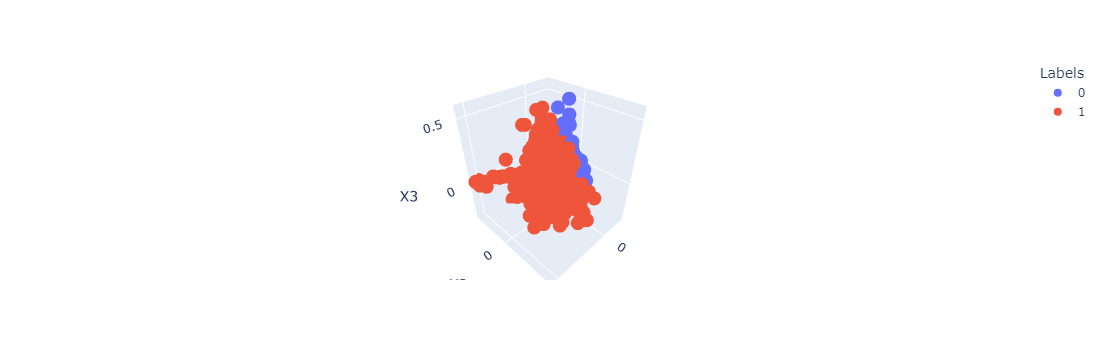

In [198]:
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
                    color=X_pca_df['Labels'])
fig.show()

# Add Labels to New Dataset

In [200]:
results_df = df_cp.copy()

results_df['Labels'] = kmeans.labels_
results_df

full_text  \
0     @unmagnetism Guwa mlh pnasaran gmn cara maenny...   
1     @augusta_tehe @iam_romans @garagarabola_ @bola...   
2     [BREAKING NEWS] Eksklusif tvOne Detik-detik Pa...   
3     Patrick Kluivert Sampai di Indonesia Hari Ini!...   
4     @kalibrant23 @ainurohman Perlu adanya pertandi...   
...                                                 ...   
2252  @unmagnetism Boleh ada yg jelasin gaa problema...   
2253  @idextratime Ngimpi lo kejauhan. Penggantinya ...   
2254  Dengan gagalnya Van Gaal menjadi Dirtek Timnas...   
2255  @dhemit_is_back @PSSI Mrk blg g trkait mafia a...   
2256  @retiofenin27417 @OghieGigs @Curacaofootbal1 @...   

                                             clean_text  Labels  
0     unmagnetism guwa mlh pnasaran gmn maennya ala ...       0  
1     augusta tehe iam romans garagarabola bolacomid...       0  
2     breaking news eksklusif tvone detik detik patr...       0  
3     patrick kluivert indonesia https t co nezyxmvv...       1  
4     kalibrant ainurohman tanding ujicoba taktik st...       0  
...                                                 ...     ...  
2252  unmagnetism yg jelasin gaa problematik patrick...       0  
2253  idextratime ngimpi lo jauh ganti patrick kluivert       0  
2254  gagal van gaal dirtek timnas indonesia tegas p...       1  
2255  dhemit is back pssi mrk blg g trkait mafia ato...       0  
2256  retiofenin oghiegigs curacaofootbal natiofscou...       0  

[2238 rows x 3 columns]

## Explore the New Dataset to Determine Positive and Negative Post

In [202]:
results_df['Labels'].value_counts()

Labels
0    1283
1     955
Name: count, dtype: int64

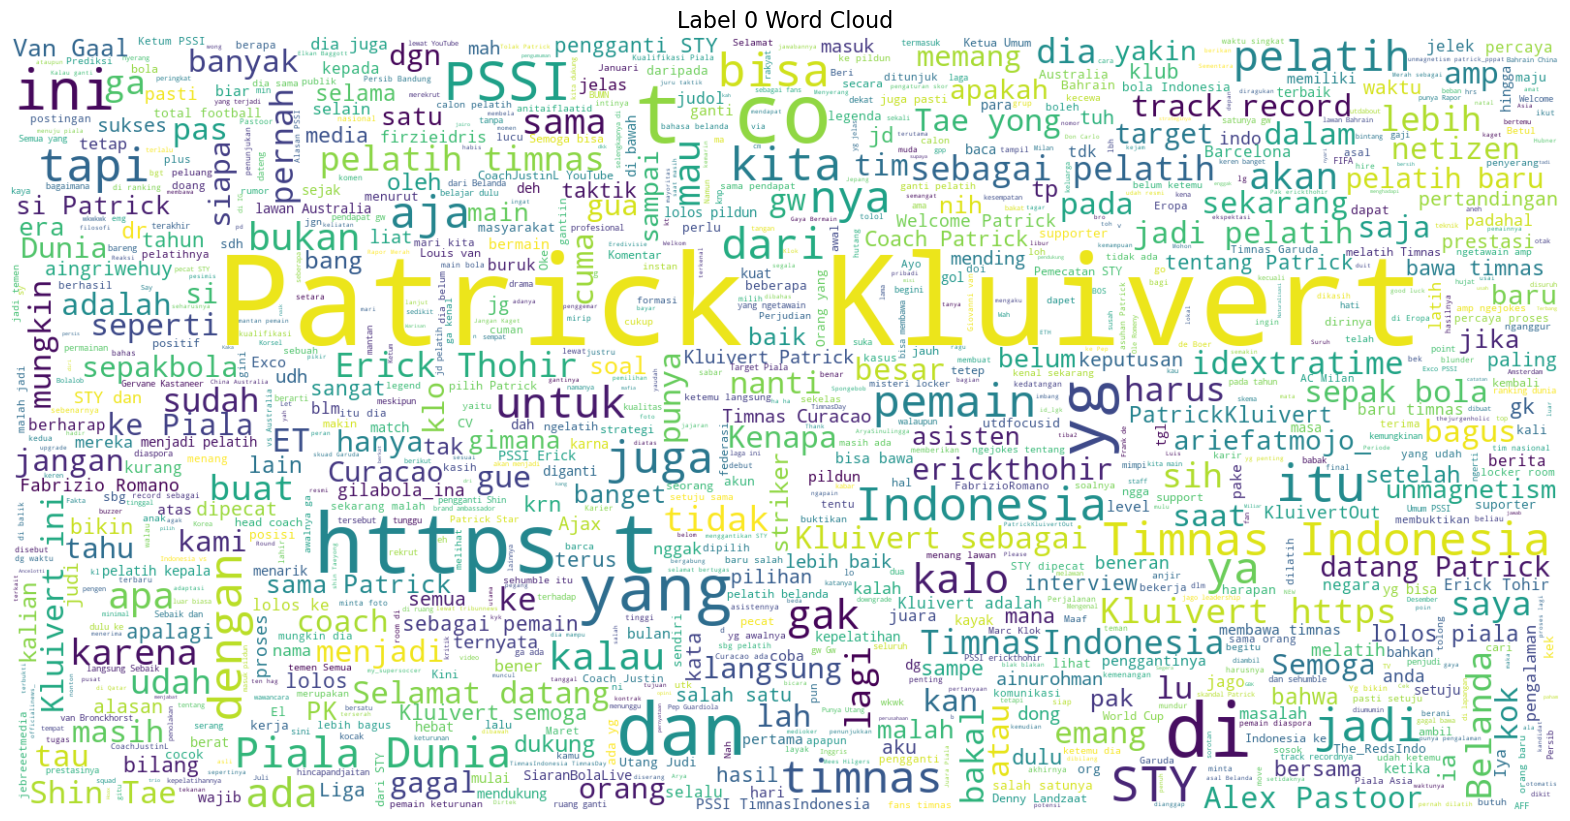

In [204]:
df_0 = results_df[results_df['Labels'] == 0]
df_0 = ' '.join(df_0['full_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_0)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Label 0 Word Cloud", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

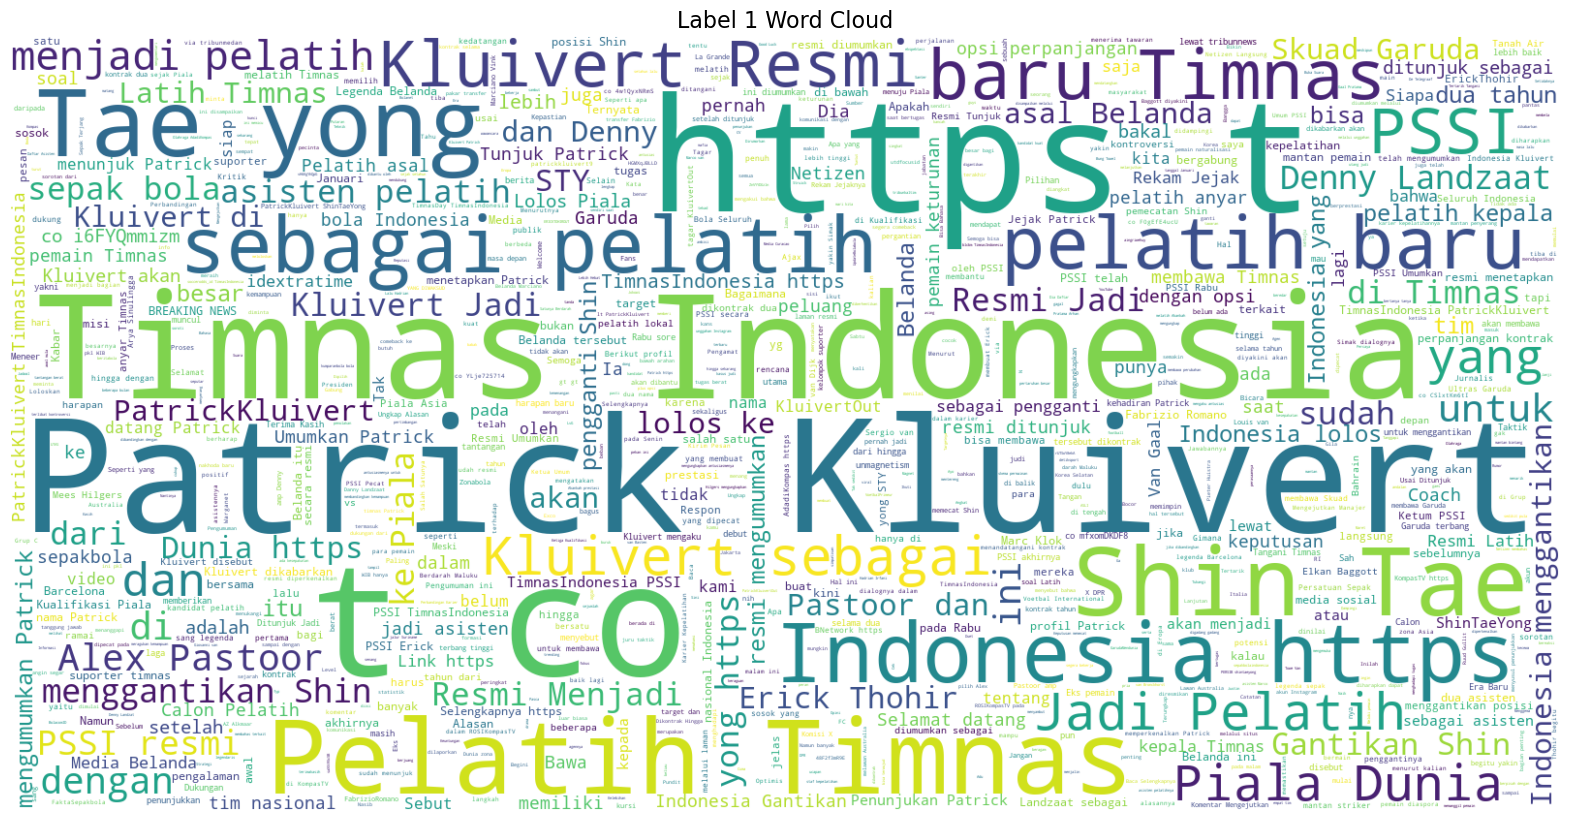

In [205]:
df_1 = results_df[results_df['Labels'] == 1]
df_1 = ' '.join(df_1['full_text'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_1)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Label 1 Word Cloud", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [206]:
results_df.to_csv("clustering.csv")

Explore by opening the new dataset in excel

# New Dataset for Classification

In [227]:
results_df["Labels"] = results_df["Labels"].map({ 0: "Negative", 1: "Positive"})
results_df

full_text  \
0     @unmagnetism Guwa mlh pnasaran gmn cara maenny...   
1     @augusta_tehe @iam_romans @garagarabola_ @bola...   
2     [BREAKING NEWS] Eksklusif tvOne Detik-detik Pa...   
3     Patrick Kluivert Sampai di Indonesia Hari Ini!...   
4     @kalibrant23 @ainurohman Perlu adanya pertandi...   
...                                                 ...   
2252  @unmagnetism Boleh ada yg jelasin gaa problema...   
2253  @idextratime Ngimpi lo kejauhan. Penggantinya ...   
2254  Dengan gagalnya Van Gaal menjadi Dirtek Timnas...   
2255  @dhemit_is_back @PSSI Mrk blg g trkait mafia a...   
2256  @retiofenin27417 @OghieGigs @Curacaofootbal1 @...   

                                             clean_text    Labels  
0     unmagnetism guwa mlh pnasaran gmn maennya ala ...  Negative  
1     augusta tehe iam romans garagarabola bolacomid...  Negative  
2     breaking news eksklusif tvone detik detik patr...  Negative  
3     patrick kluivert indonesia https t co nezyxmvv...  Positive  
4     kalibrant ainurohman tanding ujicoba taktik st...  Negative  
...                                                 ...       ...  
2252  unmagnetism yg jelasin gaa problematik patrick...  Negative  
2253  idextratime ngimpi lo jauh ganti patrick kluivert  Negative  
2254  gagal van gaal dirtek timnas indonesia tegas p...  Positive  
2255  dhemit is back pssi mrk blg g trkait mafia ato...  Negative  
2256  retiofenin oghiegigs curacaofootbal natiofscou...  Negative  

[2238 rows x 3 columns]

# Data Pre-processing for New Dataset

## Vectorization

In [257]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(results_df["clean_text"])

#Let's have a look at our feature
X.dtype

dtype('float64')

In [259]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36584 stored elements and shape (2238, 6502)>

In [261]:
pickle.dump(tfidf, open('vectorization.pkl', 'wb'))

## Splitting Dataset

In [270]:
y = results_df["Labels"]

# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1790, 6502)
(448, 6502)
(1790,)
(448,)


# Classification

In [272]:
def classification_eval(actual, predict, name):

  cm = confusion_matrix(actual, predict)
  # plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['Negative', 'Positive'],
              yticklabels=['Negative', 'Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Lables')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  print(classification_report(actual, predict))

## Find the Best Model

In [274]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    results.append({'Model': model_name, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test})

df_accuracy = pd.DataFrame(results).sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=[False, False])
df_accuracy

Model  Train Accuracy  Test Accuracy
8  Support Vector Machine        1.000000       0.979911
7           Random Forest        1.000000       0.977679
6       Gradient Boosting        1.000000       0.966518
3           Decision Tree        1.000000       0.941964
1     Logistic Regression        0.999441       0.993304
4      Bagging Classifier        0.997207       0.944196
5    Ada Boost Classifier        0.989385       0.968750
0             Naive Bayes        0.977095       0.915179
2                    K-NN        0.893855       0.841518

## Evaluate the Best Model

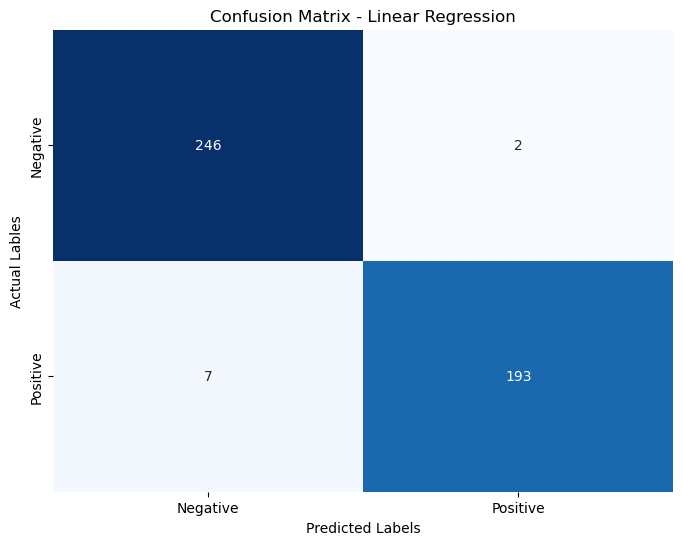

              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       248
    Positive       0.99      0.96      0.98       200

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



In [280]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

classification_eval(y_test, y_pred_test, 'Linear Regression')

# Tuning the Best Model

In [291]:
lr = LogisticRegression(random_state=42)

# define parameters for GridSearchCV
parameters = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
              'solver': ['lbfgs', 'liblinear', 'newton-cg'],
              'max_iter': [100, 1000]}

grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=5, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.1, max_iter=100, sol

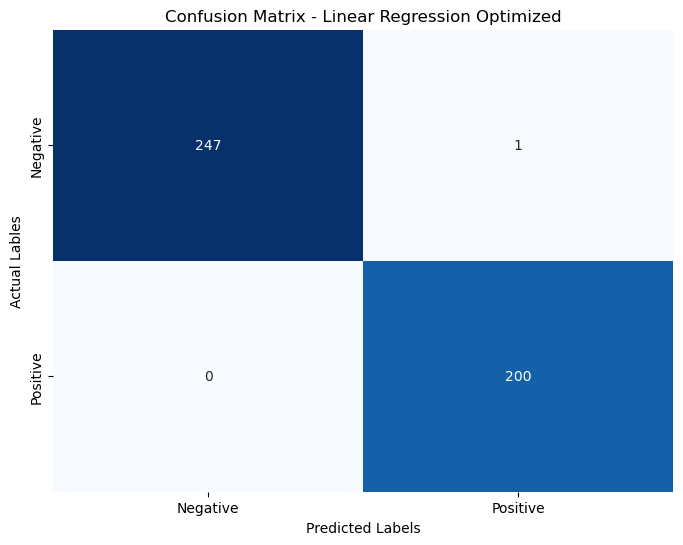

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       248
    Positive       1.00      1.00      1.00       200

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



In [293]:
lr = LogisticRegression(random_state=42, C=10000, max_iter=100, solver='lbfgs')

model = lr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

classification_eval(y_test, y_pred_test, 'Linear Regression Optimized')

In [295]:
pickle.dump(model, open('model.pkl', 'wb'))